In [3]:
import matplotlib.pyplot as plt
from time import time
plt.rcParams["figure.figsize"] = (9,7)
plt.rcParams["figure.dpi"] = 95

In [2]:
import pandas
import numpy as np
import pandas as pd
import seaborn as sns
from ProbDistribution import CLRBadDistribution, Labelling
from mllmethods import clr, LabelPowerset, classifier_chain
from metrics import HammingLoss, Fmeasure
import sys
np.set_printoptions(precision=5, suppress=True)


hl = HammingLoss()
fm = Fmeasure()

methods={'CLR': clr,
         'LabelPowerSet': LabelPowerset, 
         'Classifier Chain': classifier_chain,
         'fmeasure optimizer': lambda P: fm.minrisk(P)[0]}


n = 10
ntests = 100
epsilon_array = np.linspace(1e-8,2e-2,num=ntests)
loss_list=[]
method_name=[]
epsilons=[]
for i,e in enumerate(epsilon_array):
    sys.stdout.write('%d/%d   \r' % (i,ntests))
    sys.stdout.flush()
    P = CLRBadDistribution(n, n//2, epsilon=e)
    for mname, mth in methods.items():
        pred = mth(P)
        loss = hl.regret(pred, P)
        loss_list.append(loss)
        method_name.append(mname)
        epsilons.append(e)

df=pd.DataFrame({'Hamming Loss Regret':loss_list,
              'method':method_name,
              'epsilon':epsilons,
              'num_labels': [n]*len(loss_list)
             })
df

NameError: name 'j' is not defined

In [1]:
from ProbDistribution import CLRBadDistribution2, Labelling, CLRBadDistribution
import pandas
import numpy as np
import pandas as pd
import seaborn as sns
from mllmethods import clr, LabelPowerset, classifier_chain
from metrics import HammingLoss, Fmeasure
import sys
from time import time

np.set_printoptions(precision=5, suppress=True)

hl = HammingLoss()
fm = Fmeasure()

# methods = {'CLR':clr}
methods={'CLR': clr,
         'LabelPowerSet': LabelPowerset, 
         'Classifier Chain': classifier_chain,
         'fmeasure optimizer': lambda P: fm.minrisk(P)[0]}

metrics = [hl, fm]

n = 30
ntests = 1
loss_name=[]
loss_list=[]
method_name=[]
Ks=[]

for k in range(n//4+1):
    print(k)
    P = CLRBadDistribution2(n, n//2, k=k)
#     P.p1s*=0.88
    P._sum()
#     print(P.marginal())
    for metric in metrics:
        for mname, mth in methods.items():
            t1=time()
            pred = mth(P)
            t1=time()-t1
            print("Prediction time (%s):%.2fsec" % (mname, t1))
#             print(pred, hl.minrisk(P)[0])
            t1=time()
            loss = metric.regret(pred, P)
            t1=time()-t1
            print("Calc regret (%s):%.2fsec" % (metric.__class__.__name__, t1))
            loss_list.append(loss)
            method_name.append(mname)
            Ks.append(k)
            loss_name.append(metric.__class__.__name__)

df=pd.DataFrame({'loss':loss_list,
                 'loss function':loss_name,
                 'method':method_name,
                 'K':Ks,
                 'num_labels': [n]*len(loss_list)
                })
df

0
Prediction time (CLR):0.01sec
Calc regret (HammingLoss):0.00sec
Prediction time (LabelPowerSet):0.00sec
Calc regret (HammingLoss):0.00sec
Prediction time (Classifier Chain):0.00sec
Calc regret (HammingLoss):0.00sec
Prediction time (fmeasure optimizer):0.02sec
Calc regret (HammingLoss):0.00sec
Prediction time (CLR):0.01sec
Calc regret (Fmeasure):0.02sec
Prediction time (LabelPowerSet):0.00sec
Calc regret (Fmeasure):0.02sec
Prediction time (Classifier Chain):0.00sec
Calc regret (Fmeasure):0.02sec
Prediction time (fmeasure optimizer):0.02sec
Calc regret (Fmeasure):0.02sec
1
Prediction time (CLR):0.01sec
Calc regret (HammingLoss):0.00sec
Prediction time (LabelPowerSet):0.00sec
Calc regret (HammingLoss):0.00sec
Prediction time (Classifier Chain):0.01sec
Calc regret (HammingLoss):0.00sec
Prediction time (fmeasure optimizer):0.02sec
Calc regret (HammingLoss):0.00sec
Prediction time (CLR):0.01sec
Calc regret (Fmeasure):0.02sec
Prediction time (LabelPowerSet):0.00sec
Calc regret (Fmeasure):0.

,loss,loss function,method,K,num_labels
0,0.241935,HammingLoss,CLR,0,30
1,0.000000,HammingLoss,LabelPowerSet,0,30
2,0.000000,HammingLoss,Classifier Chain,0,30
3,0.000000,HammingLoss,fmeasure optimizer,0,30
4,0.741935,Fmeasure,CLR,0,30
...,...,...,...,...,...
59,0.104301,HammingLoss,fmeasure optimizer,7,30
60,0.092742,Fmeasure,CLR,7,30
61,0.092742,Fmeasure,LabelPowerSet,7,30
62,0.092742,Fmeasure,Classifier Chain,7,30


In [2]:
from ProbDistribution import CLRBadDistribution2, precomputePairProb

P = CLRBadDistribution2(4, 2, k=0)
P.print()
precomputePairProb(P)

[[0.3 0.  0.  0. ]
 [0.  0.3 0.  0. ]
 [0.  0.  0.3 0. ]
 [0.  0.  0.  0.3]]


array([[0.3, 0. , 0. , 0. ],
       [0. , 0.3, 0. , 0. ],
       [0. , 0. , 0.3, 0. ],
       [0. , 0. , 0. , 0.3]])

In [7]:
from itertools import combinations_with_replacement, product, combinations, permutations
l=list(combinations(list(range(5)),0))
print(len(l))
l

1


[()]

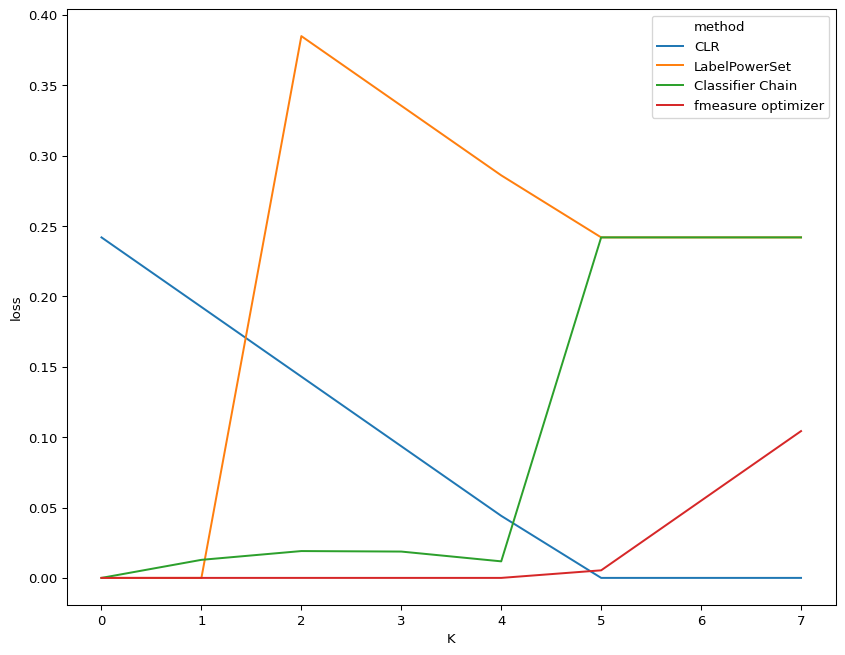

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=df[df['loss function']=='HammingLoss'],x='K',y='loss', hue='method');
plt.tight_layout()